# Workshop 3
Fabián González Vera A01367585
17/08/2023

## 2 The Central Limit Theorem

2.2 Monte Carlo simulation

In [4]:
from symbulate import *
import matplotlib
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_datareader as pdr
import pandas as pd
import numpy as np

In [38]:
# Getting price data and selecting adjusted price columns:
sprices = yf.download(tickers=['AMD','INTC'],start="2017-01-01",interval="1mo")
sprices=sprices['Adj Close']
sprices

[*********************100%%**********************]  2 of 2 completed


,AMD,INTC
Date,,
2017-01-01,10.370000,30.562117
2017-02-01,14.460000,30.047499
2017-03-01,14.550000,30.153330
2017-04-01,13.300000,30.220209
2017-05-01,11.190000,30.186773
...,...,...
2023-04-01,89.370003,30.822439
2023-05-01,118.209999,31.199532
2023-06-01,113.910004,33.320126


In [39]:
sprices =  np.log(sprices) - np.log(sprices.shift(1))

In [40]:
sprices = sprices.dropna()
sprices

,AMD,INTC
Date,,
2017-02-01,0.332469,-0.016982
2017-03-01,0.006205,0.003516
2017-04-01,-0.089827,0.002216
2017-05-01,-0.172744,-0.001107
2017-06-01,0.109107,-0.060474
...,...,...
2023-04-01,-0.092284,-0.050536
2023-05-01,0.279678,0.012160
2023-06-01,-0.037054,0.065759


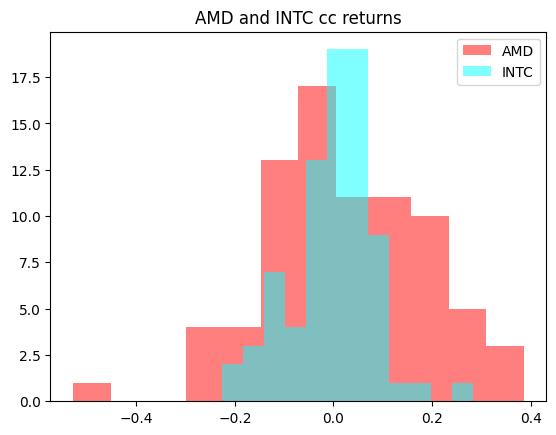

In [42]:
plt.hist(sprices['AMD'], bins=12, alpha=0.5, color='red')
plt.hist(sprices['INTC'], bins=12, alpha=0.5, color='cyan')
plt.title("AMD and INTC cc returns")
plt.legend(["AMD","INTC"])
plt.show()

HYPOTHESIS
 mean monthly cc return of AMD (AMD) is greater than the mean monthly return of Intel. Use data from Jan 2017 to date

H0: (mean(AMDr) - mean(INTCr)) > 0
Ha: (mean(AMDr) - mean(INTCr)) <> 0

In [43]:
# Calculate SE difference
n = sprices['AMD'].count()
amdVar = sprices['AMD'].var()
intelVar = sprices['INTC'].var()

SEDiff = sqrt((amdVar - intelVar)/n)
SEDiff

0.015757503184006393

In [45]:
# calculate t-stadistic

t = (sprices['AMD'].mean() - sprices['INTC'].mean())/SEDiff
t

1.804813632484564

In [47]:
# calculate p-value
# Calculating the pvalue from the t-Statistic:
from scipy import stats as st
# The st.t.sf function calculates the 1-tailed pvalue, so we multiply it by 2 to get the 2-tailed pvalue
# the degrees of freedom for 2-independent-means t-test is calculated with the following formula:
df = ( ((N-1) / N**2) * (amdVar + intelVar)**2  / ( (amdVar/N)**2 + (intelVar/N)**2  ) )
# Now we calculate the pvalue with the t and df:
pvalue = 2 * st.t.sf(np.abs(t), df)
pvalue

0.07366105257478445

In [51]:
# p value but with ttest_inf function
# Using the ttest_ind function from stats:
st.ttest_ind(sprices['AMD'],sprices['INTC'],equal_var=False)
# We got the same result as above!
# With this function we avoid calculating all steps of the hypothesis test!

TtestResult(statistic=1.363372793732292, pvalue=0.1753677022619842, df=117.67958719790803)

In [55]:
import researchpy as rp
# Using the ttest function from researchpy:
rp.ttest(sprices['AMD'],sprices['INTC'],equal_variances=False)
# We got the same result as above!
# With this function we avoid calculating all steps of the hypothesis test!

AttributeError: 'Series' object has no attribute 'append'